In [147]:
import matplotlib.pyplot as plt
import pandas as pd

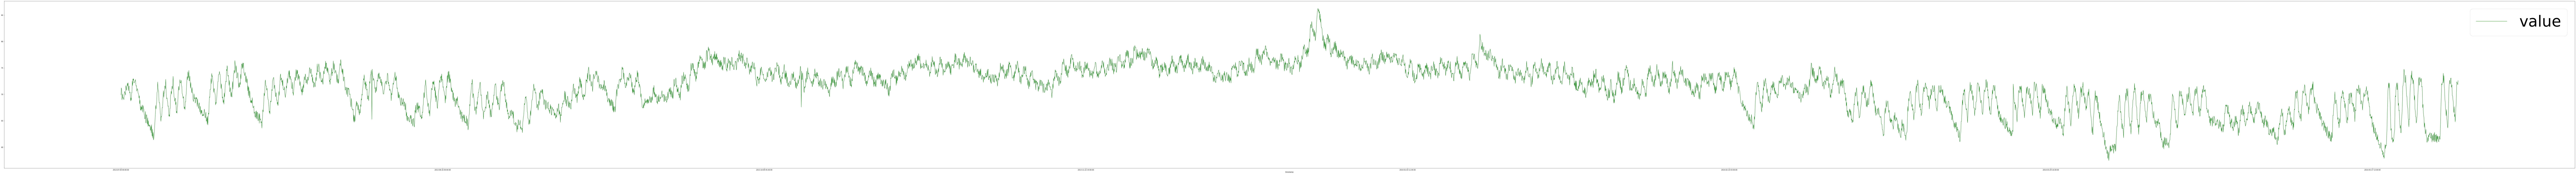

In [281]:
filename = 'NAB-master/data/realKnownCause/ambient_temperature_system_failure.csv'
df = pd.read_csv(filename)
# plt.figure(figsize=(1000, 200))

#plotting the data; could make it fancier though
df.plot(x='timestamp',x_compat=True,style='g', figsize=(300, 20))
plt.legend(fontsize=100)

In [262]:
# dealing with features; adding hours, weekday etc
datepoints = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['hours'] = datepoints.dt.hour
df['weekday'] = datepoints.dt.weekday
# df['daylight'] = ...extract here the daylight info using time.daylight; problem: cannot access the whole series as its type is datetime64[ns]
# df['daylight'] = datepoints.dt.time.daylight ???
df['isweekend'] = df['weekday']>=5
df['dayofyear'] = datepoints.dt.dayofyear
df['year'] = datepoints.dt.year
df

,timestamp,value,hours,weekday,isweekend,dayofyear,year
0,2013-07-04 00:00:00,69.880835,0,3,False,185,2013
1,2013-07-04 01:00:00,71.220227,1,3,False,185,2013
2,2013-07-04 02:00:00,70.877805,2,3,False,185,2013
3,2013-07-04 03:00:00,68.959400,3,3,False,185,2013
4,2013-07-04 04:00:00,69.283551,4,3,False,185,2013
...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,2,False,148,2014
7263,2014-05-28 12:00:00,72.172956,12,2,False,148,2014
7264,2014-05-28 13:00:00,72.046565,13,2,False,148,2014
7265,2014-05-28 14:00:00,71.825226,14,2,False,148,2014


In [263]:
# now we're gonna compare the values through hours for 2013
df_2013 = df[df['year']==2013]
df_2013
df_by_hours_2013 = df_2013.pivot(index="hours", columns="dayofyear", values="value")

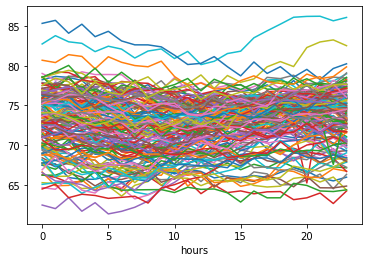

In [264]:
df_by_hours_2013.plot(legend=False)
# so there's very uninformative plot as it is too much info, even for a half of a year

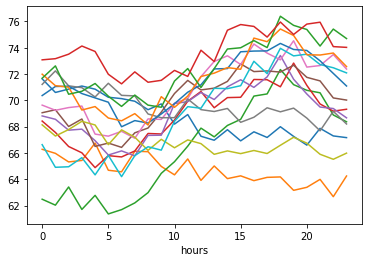

In [265]:
# lets compare just some days
df_by_hours_2013.loc[:,187:200].plot(legend=False)
#still uninformative 

In [ ]:
# ideas for further visualisation:
# compare (average) weekends and business days
# compare by weekday
# compare trhrough months
# appply other on-built types of plots

In [296]:
#split data into train and test dataset

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df)
df_train
df_test

,timestamp,value
4650,2014-01-30 13:00:00,72.153684
5858,2014-03-23 04:00:00,63.463436
4131,2014-01-08 22:00:00,75.065500
6798,2014-05-09 03:00:00,68.077855
6133,2014-04-11 10:00:00,65.969576
...,...,...
5828,2014-03-21 22:00:00,69.664004
5783,2014-03-20 01:00:00,68.825331
308,2013-07-16 20:00:00,73.788493
1038,2013-08-17 14:00:00,68.839526
